**Sentiment Analysis** also known as opinion mining is an approach to natural language processing (NLP) that identifies the emotional tone behind a body of text whether its postive, neutral or negative. 

Used for: 



*   Customer feedback
*   Market analysis (financial)



**OUTLINE**



1.   Setting up Twitter Dev
2. Query Twitter using Tweepy
3. Preprocessing the data
4. Using the NLTK and TextBlob to calculate the sentiment 
5. Visualizing the data 



In [ ]:
#Import librairies
import tweepy
from textblob import TextBlob
import pandas as pd 
import numpy as np
import re
import nltk
from wordcloud import WordCloud
nltk.download('stopwords')

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Upload the login file 
from google.colab import files 
files.upload()

Saving Credentials_twitter.csv to Credentials_twitter.csv


{'Credentials_twitter.csv': b'api_key,api_key_secret,access_token,access_token_secret\r\n66rDlduMkbiXgPFBtGcaFTi5L,QZEjKmnJLKftVnjK3yQ2qvI9DcnKh03Thbr0JPmMi0usKzdUmM,2742647219-uiGXolmN0n1d0N9Cu8a29NSaDINqDzeiABFo8iy,qQmdUGMxaHrqNUoqAYoQTIpzZ37NQIZMARmvGQCNJqCnM'}

In [ ]:
#Store the data 
log = pd.read_csv('Credentials_twitter.csv')
print(log)

                     api_key  \
0  66rDlduMkbiXgPFBtGcaFTi5L   

                                      api_key_secret  \
0  QZEjKmnJLKftVnjK3yQ2qvI9DcnKh03Thbr0JPmMi0usKz...   

                                        access_token  \
0  2742647219-uiGXolmN0n1d0N9Cu8a29NSaDINqDzeiABF...   

                             access_token_secret  
0  qQmdUGMxaHrqNUoqAYoQTIpzZ37NQIZMARmvGQCNJqCnM  


In [ ]:
#Get the Twitter API credentials
Api_Key=log['api_key'][0]
Api_Key_Secret=log['api_key_secret'][0]
Access_Token=log['access_token'][0]
Access_Token_Secret=log['access_token_secret'][0]

In [ ]:

#Create the authentication object
authenticate = tweepy.OAuthHandler(Api_Key, Api_Key_Secret)
#Set the access token and the access token secret
authenticate.set_access_token(Access_Token, Access_Token_Secret)
#Create the API object
api = tweepy.API(authenticate, wait_on_rate_limit=True)


In [ ]:
#Getting tweets from twitter
twitterAccount = 'ElonMusk'

tweets = tweepy.Cursor(api.user_timeline, screen_name=twitterAccount, lang='en', since_id=None,                     
                       max_id=None, trim_user=True, exclude_replies=True, contributor_details=False, include_entities=False, include_rts=True).items(20000)

In [ ]:
#Getting data into dataframe
df = pd.DataFrame(data=(tweet.text for tweet in tweets), columns=['Tweet'])


In [ ]:
df.head(20)

,Tweet
0,Easy swipe right/left to move between recommen...
1,Plaid is sickkk https://t.co/OxBD8Zv7Xq
2,RT @Tesla: Safety is the primary design object...
3,RT @SpaceX: Falcon Heavy in the hangar at Laun...
4,Thread on how safe Tesla cars are https://t.co...
5,8 years later &amp; still no laws … 😢 https://...
6,"If I dig my grave deep enough, maybe it comes ..."
7,Some habits are hard to break lol. Maybe I sh...
8,Ouch my feet!! https://t.co/4pqBY6rZDu
9,RT @Tesla: Tesla’s impact in California → http...


In [ ]:
#Removing all stopwords

def CleanTweet(txt):

  txt = txt.lower()
  txt = re.sub("'", "", txt) 
  txt = re.sub("@[A-Za-z0-9_]+","", txt)
  txt = re.sub("#[A-Za-z0-9_]+","", txt)
  txt = re.sub(r'http\S+', '', txt)
  txt = re.sub('[()!?]', ' ', txt)
  txt = re.sub('\[.*?\]',' ', txt)
  txt = re.sub("[^a-z0-9]"," ", txt)
  txt = txt.split()
  stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from", "rt",]
  txt = [w for w in txt if not w in stopwords]
  txt = " ".join(word for word in txt)
  return txt

In [ ]:
df['Tweet']=df['Tweet'].apply(CleanTweet)

In [ ]:
df.head(10)

,Tweet
0,easy swipe right left move between recommended...
1,plaid is sickkk
2,safety is primary design objective our vehicle...
3,falcon heavy hangar at launch complex 39a florida
4,thread how safe tesla cars are
5,8 years later amp still no laws
6,if i dig my grave deep enough maybe it comes o...
7,some habits are hard break lol maybe i should ...
8,ouch my feet
9,tesla s impact california


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   633 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB


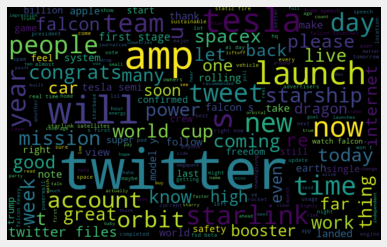

In [ ]:
#Visualizing the data with Word Cloud
words = ' '.join(twts for twts in df['Tweet'])
wordCloud = WordCloud (width = 800, height=500, random_state = 21, max_font_size = 119).generate(words)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

**Subjectivity** refers to the degree to which an individual is personally invested in an item. What matters are one's emotional attachments to the object and their own unique experiences with it, which may or may not coincide with the opinions of others.

In [ ]:
#calculatig the sunjectivity
def getTextSubjectivity(txt):
  return TextBlob(txt).sentiment.subjectivity

The intensity of a viewpoint is defined as its **polarity**. It could be good or bad. If something is associated with a strong positive sensation or emotion, such as admiration, trust, or love, it will have an effect on all other aspects of that object's existence. This also holds true for negative polarities.

In [ ]:
#Calculating the polarity
def getTextPolarity(txt):
  return TextBlob(txt).sentiment.polarity


In [ ]:
df['Subjectivity']=df['Tweet'].apply(getTextSubjectivity)
df['Polarity']=df['Tweet'].apply(getTextPolarity)

In [ ]:
df.head(10)

,Tweet,Subjectivity,Polarity
0,easy swipe right left move between recommended...,0.340476,0.193810
1,plaid is sickkk,0.000000,0.000000
2,safety is primary design objective our vehicle...,0.300000,0.200000
3,falcon heavy hangar at launch complex 39a florida,0.450000,-0.250000
4,thread how safe tesla cars are,0.500000,0.500000
5,8 years later amp still no laws,0.000000,0.000000
6,if i dig my grave deep enough maybe it comes o...,0.425000,-0.041667
7,some habits are hard break lol maybe i should ...,0.620833,0.254167
8,ouch my feet,0.000000,0.000000
9,tesla s impact california,0.000000,0.000000


In [ ]:
def getTextAnalysis(Pol):
  if Pol>0:
    return 'Positive'
  elif Pol==0:
    return 'Neutral'
  else:
    return 'Negative'

In [ ]:
df['Score'] = df['Polarity'].apply(getTextAnalysis)

In [ ]:
df.head(10)

,Tweet,Subjectivity,Polarity,Score
0,easy swipe right left move between recommended...,0.340476,0.193810,Positive
1,plaid is sickkk,0.000000,0.000000,Neutral
2,safety is primary design objective our vehicle...,0.300000,0.200000,Positive
3,falcon heavy hangar at launch complex 39a florida,0.450000,-0.250000,Negative
4,thread how safe tesla cars are,0.500000,0.500000,Positive
5,8 years later amp still no laws,0.000000,0.000000,Neutral
6,if i dig my grave deep enough maybe it comes o...,0.425000,-0.041667,Negative
7,some habits are hard break lol maybe i should ...,0.620833,0.254167,Positive
8,ouch my feet,0.000000,0.000000,Neutral
9,tesla s impact california,0.000000,0.000000,Neutral


In [ ]:
positive = df[df['Score']=='Positive']
print(str((positive.shape[0])/(df.shape[0])*100) + '% of positive tweets')
pos=positive.shape[0]/df.shape[0]*100

36.17693522906793% of positive tweets


In [ ]:
negative = df[df['Score']=='Negative']
print(str((negative.shape[0])/(df.shape[0])*100) + '% of Negative tweets')
neg=negative.shape[0]/df.shape[0]*100

10.90047393364929% of Negative tweets


In [ ]:
neutral = df[df['Score']=='Neutral']
print(str((neutral.shape[0])/(df.shape[0])*100) + '% of Neutral tweets')
neutral=neutral.shape[0]/df.shape[0]*100

52.922590837282776% of Neutral tweets


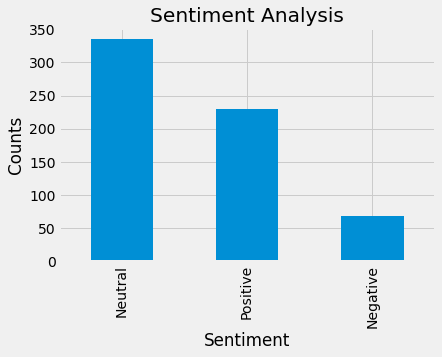

In [ ]:
df['Score'].value_counts()

#plot and visualize the counts 
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Score'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
explode=(0,0.1,0)
labels='Positive','Negative','Neutral'
sizes = [pos, neg, neutral]
colors=['gold','silver','lightcoral']

(-1.113781464458102,
 1.1028695272745739,
 -1.2057525772002657,
 1.1146320359040127)

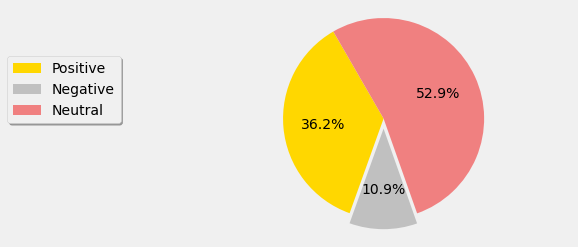

In [ ]:
plt.pie(sizes, explode=explode, colors=colors,autopct='%1.1f%%', startangle=120)
plt.legend(labels, loc=(-0.5,0.5),  shadow=True)
plt.axis('equal')


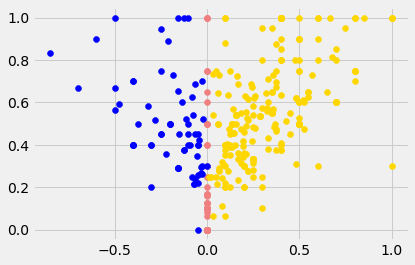

In [ ]:
for index, row in df.iterrows():
  if row['Score']=='Positive':
    plt.scatter(row['Polarity'],row['Subjectivity'],color='gold')
  elif row['Score']=='Negative':
    plt.scatter(row['Polarity'],row['Subjectivity'],color='blue')
  elif row['Score']=='Neutral':
    plt.scatter(row['Polarity'],row['Subjectivity'],color='lightcoral')